In [1]:
# 06_logistic_regression

# sigmoid 함수


In [2]:
import math
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1./(1. + math.e**-z)

# print(math.e)  # 2.718281828459045

print(sigmoid(-100)) # 0에 수렴
print(sigmoid(-10)) 
print(sigmoid(0))    # 0.5
print(sigmoid(10)) 
print(sigmoid(100))  # 1.0에 수렴

3.7200759760208555e-44
4.539786870243442e-05
0.5
0.9999546021312976
1.0


In [3]:
math.e

2.718281828459045

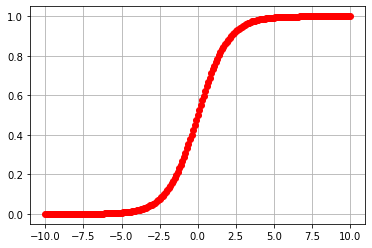

In [4]:
# 시각화
xx,yy=[],[]
for k in range(-100,101):
    n = sigmoid(k/10)
    
    xx.append(k/10)
    yy.append(n)

plt.plot(xx,yy,'ro') 
plt.grid()

### Logistic Regression : 2진 분류(Binary Classification)
: 2진 분류의 활성화 함수로는 sigmoid가 사용됨

In [5]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(5)

In [6]:
# x_data : [6,2]
x_data = [[1,2],
          [2,3],
          [3,1],
          [4,3],
          [5,3],
          [6,2]]

# y_data : [6,1]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x_train = np.array(x_data,dtype=np.float32)
y_train = np.array(y_data,dtype=np.float32)

In [7]:
# 변수 초기화 : weight, bias
# (m,n) * (n,l) = (m,l)   : 행렬의 내적 곱셈 공식
# (6,2) * (2,1) = (6,1)
W = tf.Variable(tf.random.normal([2,1]),name='weight')
b = tf.Variable(tf.random.normal([1]),name='bias')
print(W)
print(b)

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.18030666],
       [-0.95028627]], dtype=float32)>
<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.22652863], dtype=float32)>


In [8]:
# 예측 함수(hypothesis) : H(X) = sigmoid(X*W + B)
def hypothesis(X):
    return tf.sigmoid(tf.matmul(X,W) + b)  # 0과 1사이의 값이 출력

In [9]:
# 비용 함수 : logloss, 2진분류모델
def cost_func():
    cost = -tf.reduce_mean(y_train*tf.math.log(hypothesis(x_train)) +
                          (1 - y_train)*tf.math.log(1-hypothesis(x_train)))
    return cost

In [10]:
# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [11]:
# 학습 시작
print('***** Start Learning!!')
for step in range(10001):
    optimizer.minimize(cost_func,var_list=[W,b])
    if step % 1000 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
print('***** Learning Finished!!') 

***** Start Learning!!
0000 cost:[ 1.661137 ]  W: [[-0.17030667]
 [-0.9402863 ]]  b: [0.23652855]
1000 cost:[ 0.17934637 ]  W: [[1.3178084]
 [0.1972357]]  b: [-4.7614303]
2000 cost:[ 0.07253333 ]  W: [[2.0121024]
 [0.8405848]]  b: [-8.711953]
3000 cost:[ 0.03700613 ]  W: [[2.6189137]
 [1.2299302]]  b: [-11.698347]
4000 cost:[ 0.020763235 ]  W: [[3.1709244]
 [1.5396556]]  b: [-14.285829]
5000 cost:[ 0.012184962 ]  W: [[3.692799 ]
 [1.8153365]]  b: [-16.680557]
6000 cost:[ 0.007318981 ]  W: [[4.197648]
 [2.074366]]  b: [-18.973688]
7000 cost:[ 0.0044522597 ]  W: [[4.6926703]
 [2.3246489]]  b: [-21.210665]
8000 cost:[ 0.002727745 ]  W: [[5.181943]
 [2.570163]]  b: [-23.415743]
9000 cost:[ 0.0016780336 ]  W: [[5.6678133]
 [2.812966 ]]  b: [-25.60229]
10000 cost:[ 0.0010347451 ]  W: [[6.1516347]
 [3.054243 ]]  b: [-27.777966]
***** Learning Finished!!


In [12]:
# weight과 bias 출력
print('Weight:',W.numpy())
print('Bias:',b.numpy())

Weight: [[6.1516347]
 [3.054243 ]]
Bias: [-27.777966]


In [14]:
# 평가 : 정확도(accuracy)
def predict(X):
    return tf.cast(hypothesis(X) > 0.5 ,dtype=tf.float32)

# 학습 데이터를 그대로 검증 데이터로 사용하여 예측한 경우
x_test = x_train
y_test = y_train

# 예측
preds = predict(x_test)   
print(preds)

# 정확도
accuracy = tf.reduce_mean(tf.cast(tf.equal(preds,y_test),dtype=tf.float32))
print('Accuracy:',accuracy.numpy())
print('Hypothesis:\n',hypothesis(x_test).numpy())
print('Predict:\n',preds.numpy())

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]], shape=(6, 1), dtype=float32)
Accuracy: 1.0
Hypothesis:
 [[1.8225749e-07]
 [1.8111762e-03]
 [1.8908845e-03]
 [9.9750584e-01]
 [9.9999470e-01]
 [9.9999976e-01]]
Predict:
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [15]:
# 예측
print('***** Predict')
# x_data = [[1,2],
#           [2,3],
#           [3,1],
#           [4,3],
#           [5,3],
#           [6,2]]
x_data = [[1,1],
          [2,5],
          [3,3],
          [4,4],
          [5,2],
          [6,6]]
x_test = np.array(x_data,dtype=np.float32)
preds = predict(x_test)
print(preds.numpy())

***** Predict
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
